# Project: Investigate the TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

From the list of data set options provided I have chosen the 'TMDb movie data' set. The data contains various information regarding a list of selected movies, from budget used to main actors and average votes. 

The data set can be used to investigate what makes a movie successful, is this depending on the director, on the production company or maybe a higher investement in the budget that might increase the quality of the movies guarantees a higher revenue at the end? Are the actors also playing an essential role in the movies's success or maybe this is influenced more by the genre? Thinking about the genres, which are the most successfull ones over the years, is there a specific one that has been always on top and what was its evolution in time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

The file was downloaded as tab separated in order to avoid using comma as a separator as this would be messing up with the data as it contains many commas in some columns. 

In [2]:
#Loading the data and printing the first lines
tmdb_movies = pd.read_csv("tmdb_movies.tsv",sep='\t')
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In the next steps I will assess the data set by checking the data types, number of non null values, descriptive statistics and unique values. Based on this information I will decide which data I will need in my analysis and remove the rest after.

In [3]:
#checking the number of rows and columns
tmdb_movies.shape

(10866, 21)

In [4]:
#check for unique rows
tmdb_movies.id.nunique()

10865

I see that I have 10866 rows but 10865 ones are unique, this means I will need to identify and remove a duplicate one.

In [5]:
#checking the data types of each column to see if they are correctly defined
tmdb_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The release_date column should be defined as a datetime type and not as an object so I will change that.

In [6]:
#replace data type to datetime
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

In [7]:
#check again the data types
tmdb_movies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [8]:
#check how many records there are for each column
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

I notice that there are some null values for genres which I intend to use in my analysis. The rest that have missing values such as imdb_id, homepage, cast, director, keywords, production_companies, tagline and overview I will ignore, since I want to drop them anyway.
In the 'Data cleaning' step I will decide what to do about the missing values, replace them or drop them from my data set. 

In [9]:
#descriptive statistics of the data set
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I observe that over 50% of the budget and revenue data is 0, I will replace these with the mean values.

### Data Cleaning

In the data exploration part I identified the data that I need, I found that there are some missing values and also that there is a duplicated row. I will proceed with the following:
* Drop the unwanted columns
* Drop duplicated row
* Replace values where null or identified as 0

In [10]:
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


In [11]:
#drop columns that I don't need for my analysis
tmdb_movies.drop(columns=[
    'imdb_id',
    'homepage',
    'budget',
    'revenue',
    'cast',
    'director',
    'keywords',
    'runtime',
    'production_companies',
    'tagline',
    'overview'], inplace=True)

In [12]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
genres            10843 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 849.0+ KB


In [13]:
#find duplicated row
tmdb_movies[tmdb_movies.duplicated(['id'], keep=False)]

,id,popularity,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [14]:
#drop duplicated row
tmdb_movies.drop_duplicates(subset='id',keep='first',inplace=True)

In [15]:
#check again the data
tmdb_movies.duplicated().sum()

0

Before moving further to dropping or replacing missing values I will have a look to see how much in percentage out of the total am I missing in order to take a better decision.

In [16]:
(tmdb_movies.isnull().sum())/10865

id                0.000000
popularity        0.000000
original_title    0.000000
genres            0.002117
release_date      0.000000
vote_count        0.000000
vote_average      0.000000
release_year      0.000000
budget_adj        0.000000
revenue_adj       0.000000
dtype: float64

I decided to keep the missing values and replace them with unknows for all the string columns I have.

In [17]:
#replace null with 'unknown'
tmdb_movies['genres'].fillna(value='unknown', inplace=True)

In [18]:
#check the data
tmdb_movies.isnull().sum()

id                0
popularity        0
original_title    0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

For the missing budget and revenue data I decided that I will replace the 0s with the mean value.

In [19]:
#replace the 0s with mean values
tmdb_movies['budget_adj'].replace(0, tmdb_movies['budget_adj'].mean(), inplace=True)
tmdb_movies['revenue_adj'].replace(0, tmdb_movies['revenue_adj'].mean(), inplace=True)

In [20]:
#check again the descriptive statistics
tmdb_movies.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,92134.091971,1.000231,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,5.000000,0.000065,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,20662.000000,0.383831,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,75612.000000,0.713857,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [21]:
#check the correlation
tmdb_movies.corr()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.035555,-0.058391,0.511393,-0.151481,-0.107513
popularity,-0.014351,1.000000,0.800828,0.209517,0.089806,0.482815,0.578162
vote_count,-0.035555,0.800828,1.000000,0.253818,0.107962,0.569203,0.685955
vote_average,-0.058391,0.209517,0.253818,1.000000,-0.117576,0.087895,0.173239
release_year,0.511393,0.089806,0.107962,-0.117576,1.000000,0.020369,-0.064884
budget_adj,-0.151481,0.482815,0.569203,0.087895,0.020369,1.000000,0.602133
revenue_adj,-0.107513,0.578162,0.685955,0.173239,-0.064884,0.602133,1.000000


<a id='eda'></a>
## Exploratory Data Analysis
* Research Question 1: Is budget influencing the success of a movie?
* Research Question 2: Which was the most popular genre of all times? How does it compare to the rest over the years?


### Research Question 1: Is budget influencing the success of a movie?

The first question analysis if a higher budged influences other variables, making this way a movie more successfull. I decided to compare the 75th percentile against the 25th percentile, in order to better see how these 2 groups behave next to popularity, revenue_adj, vote_average and profit_adj. I will use the adjusted values in order to better have an overview of the current situation. I will add two additional columns to the data, one with adjusted profit and one with a budget flag, marking the movies that are in the 75th percentile as high, between 75th and 25th as medium and the movies in the 25th percentile as low.


In [22]:
#calculate and add the profit column
tmdb_movies['profit_adj'] = tmdb_movies['revenue_adj'] - tmdb_movies['budget_adj']

In [23]:
#check budget quantiles 
tmdb_movies.budget_adj.describe()

count    1.086500e+04
mean     2.675046e+07
std      3.051007e+07
min      9.210911e-01
25%      1.754989e+07
50%      1.754989e+07
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [24]:
#bin edges that will be used to "cut" the budget into groups
bin_edges = [9.210911e-01,1.754989e+07,2.085325e+07,4.250000e+08]
#labels for the the 3 budget groups
bin_names = ['low','medium','high']
#adding the budget_flag column to the data
tmdb_movies['budget_flag'] = pd.cut(tmdb_movies['budget_adj'],bin_edges,labels=bin_names)

In [25]:
#check again the data
tmdb_movies.head()

,id,popularity,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,budget_flag
0,135397,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,high
1,76341,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08,high
2,262500,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08,high
3,140607,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09,high
4,168259,9.335014,Furious 7,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09,high


In [26]:
#find the mean of each budget_flag with groupby
tmdb_movies.groupby('budget_flag').mean()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
budget_flag,,,,,,,,
low,63178.325889,0.582161,154.355059,5.928578,2002.015497,7.115868e+06,4.603383e+07,3.891796e+07
medium,83088.550479,0.355056,52.512011,5.926121,2001.386192,1.762487e+07,4.811670e+07,3.049183e+07
high,31021.069562,1.336968,629.655134,6.120317,2000.616121,6.260976e+07,1.765447e+08,1.139349e+08


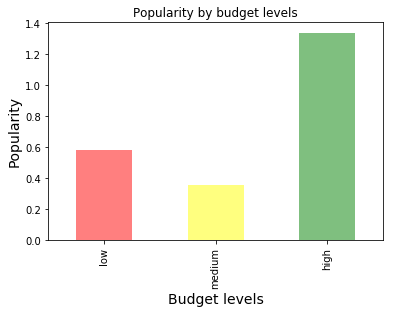

In [27]:
#check popularity mean in a bar chart
colors = ['red','yellow','green']
popularity_means=tmdb_movies.groupby('budget_flag')['popularity'].mean()
popularity_means.plot(kind='bar',title='Popularity by budget levels',color=colors, alpha=.5)
plt.xlabel('Budget levels', fontsize=14)
plt.ylabel('Popularity', fontsize=14);

High budget movies have a clearly higer popularity score than lower ones. 
As I replaced the 0 values for budget with the mean, the medium movies were expected to not follow a logical course, this is why I decided from the beginning to exclude them from my analysis. 

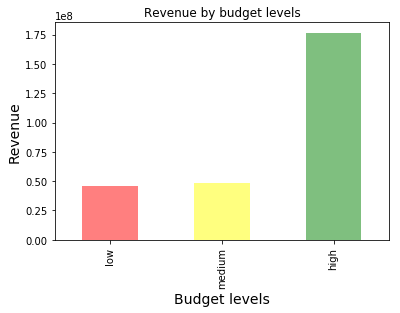

In [28]:
#check revenue mean in a bar chart
colors = ['red','yellow','green']
revenue_means=tmdb_movies.groupby('budget_flag')['revenue_adj'].mean()
revenue_means.plot(kind='bar',title='Revenue by budget levels',color=colors, alpha=.5)
plt.xlabel('Budget levels', fontsize=14)
plt.ylabel('Revenue', fontsize=14);

As for popularity, the higher the budget assigned to a movie the higher seems to be the revenue. I was expecting this as the correlation between budget_adj and revenue_adj is the highest across all: 0.6.

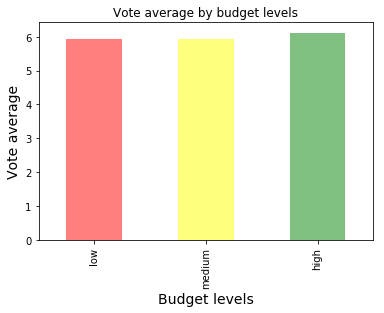

In [29]:
#check vote average mean in a bar chart
colors = ['red','yellow','green']
vote_means=tmdb_movies.groupby('budget_flag')['vote_average'].mean()
vote_means.plot(kind='bar',title='Vote average by budget levels',color=colors, alpha=.5)
plt.xlabel('Budget levels', fontsize=14)
plt.ylabel('Vote average', fontsize=14);

I was expecting that the average votes will also be in line with popularity, seems that there is no impact of the budget on the average votes.

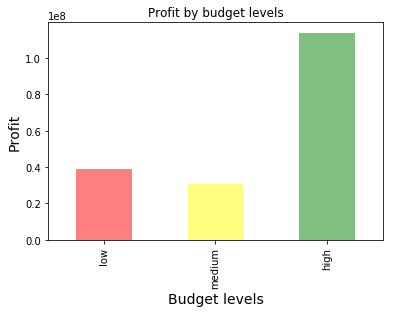

In [30]:
#check profit mean in a bar chart
colors = ['red','yellow','green']
profit_means=tmdb_movies.groupby('budget_flag')['profit_adj'].mean()
profit_means.plot(kind='bar',title='Profit by budget levels',color=colors, alpha=.5)
plt.xlabel('Budget levels', fontsize=14)
plt.ylabel('Profit', fontsize=14);

As for revenue, the profit seems to be higher for movies with higher budget.

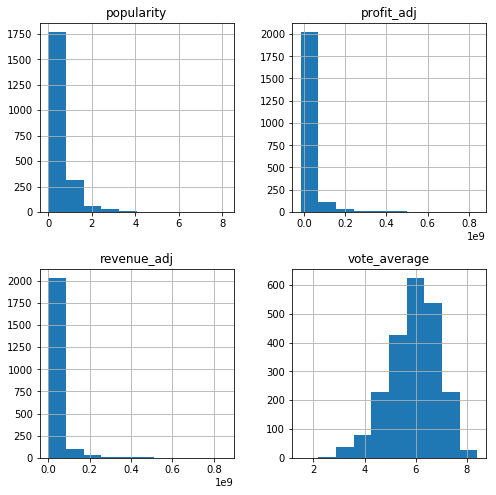

In [31]:
#check the distribution of low budget movies through the 4 variables we want to compare against

tmdb_movies[tmdb_movies.budget_flag == 'low'][['popularity', 
                                               'revenue_adj', 
                                               'vote_average', 
                                               'profit_adj']].hist(figsize=(8,8));


After checking the mean values for the budget levels across popularity, revenue, vote_average and profit I identified that vote_average is not impacted by the high budgets allocated so I wanted to investigate more why this might be the case. I checked first the distribution separated for low and for high budget.

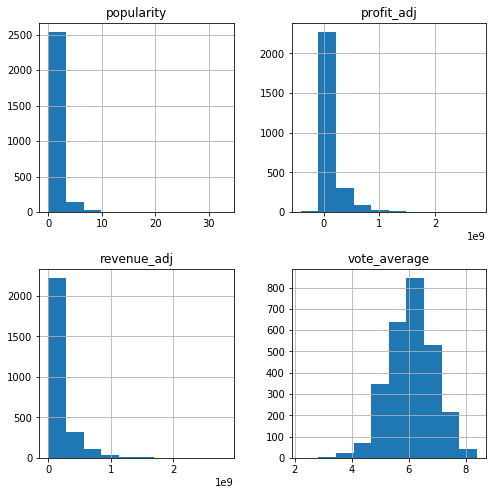

In [32]:
#check the distribution of high budget movies through the 4 variables we want to compare against
tmdb_movies[tmdb_movies.budget_flag == 'high'][['popularity', 
                                                'revenue_adj', 
                                                'vote_average', 
                                                'profit_adj']].hist(figsize=(8,8));

In both cases popularity, profit_adj and revenue_adj is skewed to the right while vote_average is skewed to the left. I will further combine the graphs in order to validate my assumption that a higher amount of budget invested in a movie influences the other variables positively.

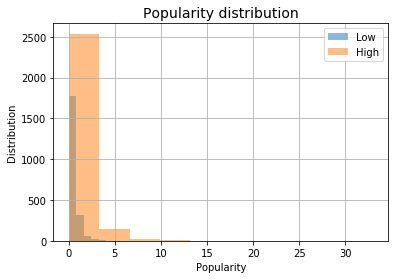

In [33]:
#combine the low & high distributions across popularity in order to better see the differences
tmdb_movies[tmdb_movies.budget_flag == 'low']['popularity'].hist(alpha=.5, label = 'Low')
tmdb_movies[tmdb_movies.budget_flag == 'high']['popularity'].hist(alpha=.5, label = 'High')
plt.legend()
plt.title('Popularity distribution',fontsize=14)
plt.xlabel('Popularity', fontsize=10)
plt.ylabel('Distribution', fontsize=10);

My assumption is validated: the higher the budget the higher the popularity.

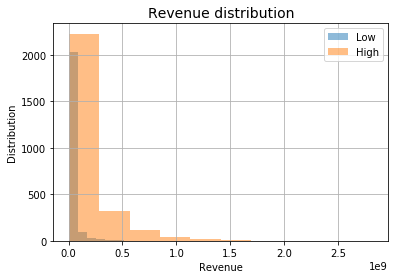

In [34]:
#combine the low & high distributions across revenue in order to better see the differences
tmdb_movies[tmdb_movies.budget_flag == 'low']['revenue_adj'].hist(alpha=.5, label = 'Low')
tmdb_movies[tmdb_movies.budget_flag == 'high']['revenue_adj'].hist(alpha=.5, label = 'High')
plt.legend()
plt.title('Revenue distribution',fontsize=14)
plt.xlabel('Revenue', fontsize=10)
plt.ylabel('Distribution', fontsize=10);



My assumption is validated: the higher the budget the higher the revenue.

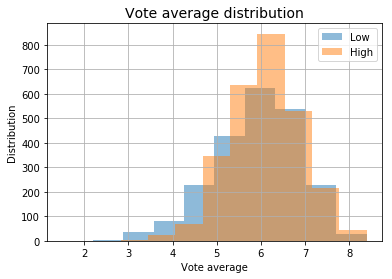

In [35]:
#combine the low & high distributions across vote avergae in order to better see the differences
tmdb_movies[tmdb_movies.budget_flag == 'low']['vote_average'].hist(alpha=.5, label = 'Low')
tmdb_movies[tmdb_movies.budget_flag == 'high']['vote_average'].hist(alpha=.5, label = 'High')
plt.legend()
plt.title('Vote average distribution',fontsize=14)
plt.xlabel('Vote average', fontsize=10)
plt.ylabel('Distribution', fontsize=10);


As identified previously, although high budget movies have slightly better average votes, it is not enough to conclude that budget has any impact on the votes values.

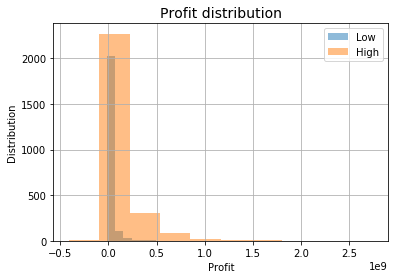

In [36]:
#combine the low & high distributions across profit adjusted in order to better see the differences
tmdb_movies[tmdb_movies.budget_flag == 'low']['profit_adj'].hist(alpha=.5, label = 'Low')
tmdb_movies[tmdb_movies.budget_flag == 'high']['profit_adj'].hist(alpha=.5, label = 'High')
plt.legend()
plt.title('Profit distribution',fontsize=14)
plt.xlabel('Profit', fontsize=10)
plt.ylabel('Distribution', fontsize=10);

My assumption is validated: the higher the budget the higher the profit.

### Research Question 2: Which was the most popular genre of all times? How does it compare to the rest over the years?

With the second research question I would like to identify the most popular genre overall. For this I will use popularity to identify it. I would first need to ungroup the data in the the genres column in order to identify the single genre's popularity.
I would like then to see how the mean popularity of the top genre changed over time in comparison to the mean popularity off all genres. I would like to compare the first 3 top popular genres to see if indeed the first genre overall was always the most popular one or if there were periods of time when its popularity dropped.

In [37]:
#change genres from string to list data type
tmdb_movies['genres'] = tmdb_movies['genres'].apply(lambda x: x.split('|'))

In [38]:
#get distinct genres values
genres = set()
for genre_list in tmdb_movies.genres.values.tolist():
    for genre in genre_list:
        genres.add(genre)

In [39]:
#check the list
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'unknown'}

In [40]:
#add new columns to the data set
for genre in genres:
    tmdb_movies[genre] = tmdb_movies['genres'].apply(lambda x: genre in x)

In [41]:
tmdb_movies.head()

,id,popularity,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,Romance,Fantasy,Adventure,Comedy,Horror,Animation,Drama,TV Movie,Documentary,Family
0,135397,32.985763,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,...,False,False,True,False,False,False,False,False,False,False
1,76341,28.419936,Mad Max: Fury Road,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,...,False,False,True,False,False,False,False,False,False,False
2,262500,13.112507,Insurgent,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,...,False,False,True,False,False,False,False,False,False,False
3,140607,11.173104,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,...,False,True,True,False,False,False,False,False,False,False
4,168259,9.335014,Furious 7,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,...,False,False,False,False,False,False,False,False,False,False


In [42]:
#create a temporary data frame containing the original columns with the new genres columns transformed into rows
original_columns = set(tmdb_movies.columns.to_list()) - genres
temp_tmdb = tmdb_movies.melt(id_vars = original_columns, var_name='genre', value_name = 'is_genre')

In [43]:
temp_tmdb.head()

,release_year,genres,budget_flag,vote_average,budget_adj,profit_adj,vote_count,popularity,revenue_adj,id,release_date,original_title,genre,is_genre
0,2015,"[Action, Adventure, Science Fiction, Thriller]",high,6.5,137999939.3,1.254446e+09,5562,32.985763,1.392446e+09,135397,2015-06-09,Jurassic World,unknown,False
1,2015,"[Action, Adventure, Science Fiction, Thriller]",high,7.1,137999939.3,2.101614e+08,6185,28.419936,3.481613e+08,76341,2015-05-13,Mad Max: Fury Road,unknown,False
2,2015,"[Adventure, Science Fiction, Thriller]",high,6.3,101199955.5,1.704191e+08,2480,13.112507,2.716190e+08,262500,2015-03-18,Insurgent,unknown,False
3,2015,"[Action, Adventure, Science Fiction, Fantasy]",high,7.5,183999919.0,1.718723e+09,5292,11.173104,1.902723e+09,140607,2015-12-15,Star Wars: The Force Awakens,unknown,False
4,2015,"[Action, Crime, Thriller]",high,7.3,174799923.1,1.210949e+09,2947,9.335014,1.385749e+09,168259,2015-04-01,Furious 7,unknown,False


In [44]:
#create a temp data frame containing only data available
temp_genres = temp_tmdb[temp_tmdb.is_genre == True]

In [45]:
temp_genres.sort_values(by=['id'])

,release_year,genres,budget_flag,vote_average,budget_adj,profit_adj,vote_count,popularity,revenue_adj,id,release_date,original_title,genre,is_genre
160197,1995,[Comedy],low,6.4,5.723867e+06,4.292901e+05,293,1.234890,6.153158e+06,5,1995-12-25,Four Rooms,Comedy,True
108033,1993,"[Action, Thriller, Crime]",medium,6.4,1.754989e+07,7.704493e+05,36,0.815631,1.832034e+07,6,1993-10-15,Judgment Night,Crime,True
97168,1993,"[Action, Thriller, Crime]",medium,6.4,1.754989e+07,7.704493e+05,36,0.815631,1.832034e+07,6,1993-10-15,Judgment Night,Thriller,True
75438,1993,"[Action, Thriller, Crime]",medium,6.4,1.754989e+07,7.704493e+05,36,0.815631,1.832034e+07,6,1993-10-15,Judgment Night,Action,True
66519,1977,"[Adventure, Action, Science Fiction]",high,7.9,3.957559e+07,2.750137e+09,4428,12.037933,2.789712e+09,11,1977-03-20,Star Wars,Action,True
23059,1977,"[Adventure, Action, Science Fiction]",high,7.9,3.957559e+07,2.750137e+09,4428,12.037933,2.789712e+09,11,1977-03-20,Star Wars,Science Fiction,True
142574,1977,"[Adventure, Action, Science Fiction]",high,7.9,3.957559e+07,2.750137e+09,4428,12.037933,2.789712e+09,11,1977-03-20,Star Wars,Adventure,True
222254,2003,"[Animation, Family]",high,7.4,1.114231e+08,9.134635e+08,3692,3.440519,1.024887e+09,12,2003-05-30,Finding Nemo,Family,True
178794,2003,"[Animation, Family]",high,7.4,1.114231e+08,9.134635e+08,3692,3.440519,1.024887e+09,12,2003-05-30,Finding Nemo,Animation,True
188883,1994,"[Comedy, Drama, Romance]",high,8.1,8.091114e+07,9.164222e+08,4856,6.715966,9.973333e+08,13,1994-07-06,Forrest Gump,Drama,True


In [46]:
#find the most popular movie genre
temp_genres.groupby(['genre']).mean().popularity.sort_values(ascending=False)

genre
Adventure          1.154259
Science Fiction    1.001548
Fantasy            0.992840
Action             0.926274
Animation          0.852182
Family             0.786668
Crime              0.744930
Thriller           0.741563
War                0.727683
Mystery            0.690012
Comedy             0.592607
Romance            0.592082
Drama              0.591495
Western            0.590615
History            0.575936
Music              0.487321
Horror             0.465357
TV Movie           0.270896
Foreign            0.191496
Documentary        0.181432
unknown            0.167966
Name: popularity, dtype: float64

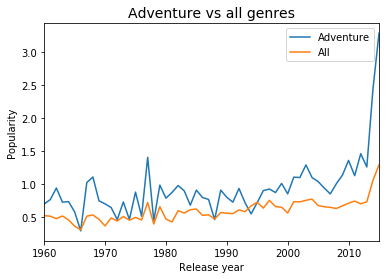

In [47]:
#compare mean values of genre "Adventure" against all genres' mean values
temp_genres[temp_genres['genre'] == 'Adventure'].groupby(['release_year']).mean().popularity.\
    plot(kind='line',label = 'Adventure')
temp_genres.groupby(['release_year']).mean().popularity.plot(kind='line',label = 'All')
plt.legend()
plt.title("Adventure vs all genres",fontsize=14)
plt.xlabel('Release year', fontsize=10)
plt.ylabel('Popularity', fontsize=10);

Seeing this I decided to normalized the data with a moving average over a 10 years period as I notice that, especially in the first years, "Adventure" genre fluctuates quite a lot between very popular years and close to or under the total average ones.

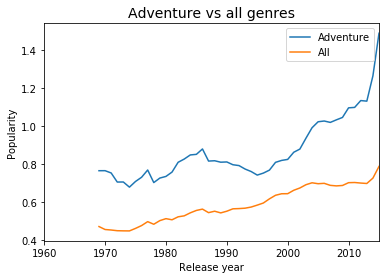

In [48]:
#normalize the data with a 10 years moving averge
temp_genres[temp_genres['genre'] == 'Adventure'].groupby(['release_year']).mean().popularity.\
    rolling(window=10).mean().plot(kind='line',label = 'Adventure')
temp_genres.groupby(['release_year']).mean().popularity.rolling(window=10).mean().plot(kind='line',label = 'All')
plt.legend()
plt.title("Adventure vs all genres",fontsize=14)
plt.xlabel('Release year', fontsize=10)
plt.ylabel('Popularity', fontsize=10);

Here I can better observe the evolution in mean popularity scores of the "Adventure" genre over the total means.
Both popularity scores have an increasing tendency, with "Adventure" experiencing a sudden drop after the 90s. It might be that during this period another genre was replacing "Adventure" as the number 1 most popular movie genre.

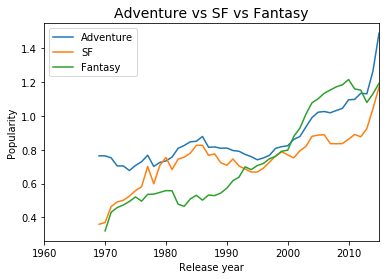

In [49]:
#compare the top 3 genres evolution in popularity over time
temp_genres[temp_genres.genre == 'Adventure']\
    .groupby(['release_year']).mean().popularity.rolling(window=10).mean().plot(kind='line',label = 'Adventure')
temp_genres[temp_genres.genre == 'Science Fiction']\
    .groupby(['release_year']).mean().popularity.rolling(window=10).mean().plot(kind='line',label = 'SF')
temp_genres[temp_genres.genre == 'Fantasy']\
    .groupby(['release_year']).mean().popularity.rolling(window=10).mean().plot(kind='line',label = 'Fantasy')
plt.legend()
plt.title("Adventure vs SF vs Fantasy",fontsize=14)
plt.xlabel('Release year', fontsize=10)
plt.ylabel('Popularity', fontsize=10);

My previous assumption is validated, "Fantsay" was the most popular genre after 2000, leaving "Adventure" behind. It might also be that other genres were taking the first place for some short periods but "Adventure", with an overall mean of 1.15 in popularity is the clear preffered genre for the sample of the data analysed.  

<a id='conclusions'></a>
## Conclusions

* Research Question 1: Is budget influencing the success of a movie?

For the first research question I checked if the budget adjusted values influence the other caractheristics of a movie positively, such as popularity, revenue, average vote and profit. Comparing high budget movies against low budget movies resulted in a positive influence for popularity, revenue and profit of movies with higer budgets. Regarding average vote, even if the votes are still slightly better for high budget movies it does not clearly indicate that the higher the budget of a movie the better the votes it will receive.


* Research Question 2: Which was the most popular genre of all times? How does it compare to the rest over the years?

For the second research question I wanted to know which was the all time most popular movie genre. As a movie could have multiple genres encapsulated into the same column I had to split it and make sure I was correctly counting only one genre at a time. After this was done it was easy to play with the data and see how the overall most popular genre, "Adventure", evolved in time against all genres and against the other two most popular genres. During 2000 and 2010 there was a clear drop in "Adventure" movies popularity losing against "Fantasy", redeeming the first place again in the most recent years. 

* Limitations:

There were many missing values (displayed as 0) for the budget_adj column and I used a mean to fill them, this might not be the best method to replace missing values, it is however also hard to make a prediction based on the available data. Given that IMDb's Wikipedia page states that there are in total around half million movies listed this is a very small sample of the data, with half of the values for the in scope variable, adjusted budget, missing. This is not enough to properly represent the population so it might be that there is actually no relation between budget and the others variables.
There is further a lot of data not provided, that would help improve the analysis, such as the budget split. It would be interesting to see what percentage of the budget was allocated to marketing campaigns, as this might directly influence the popularity and possibly also the revenue. 


Sources:
* Pandas cheat sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* Reshaping and pivot tables: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
